In [1]:
from star.pytorch.star import STAR
import numpy as np
from numpy import newaxis
import pickle
import os
import torch

star = STAR(gender='female')
betas_ = np.array([
            np.array([ 2.25176191, -3.7883464, 0.46747496, 3.89178988,
                      2.20098416, 0.26102114, -3.07428093, 0.55708514,
                      -3.94442258, -2.88552087])])

betas = np.array([
            np.array([ 2.25176191, 3.7883464, 0.46747496, 3.89178988,
                      2.20098416, 0.26102114, 3.07428093, 0.55708514,
                      3.94442258, 2.88552087])])

num_betas=10
batch_size=1
m = STAR(gender='male',num_betas=num_betas)

# Zero pose
poses = torch.cuda.FloatTensor(np.zeros((batch_size,72)))
betas = torch.cuda.FloatTensor(betas)

trans = torch.cuda.FloatTensor(np.zeros((batch_size,3)))
model = star.forward(poses, betas,trans)
shaped = model.v_shaped[-1, :, :]
shaped=shaped.detach().cpu().numpy()

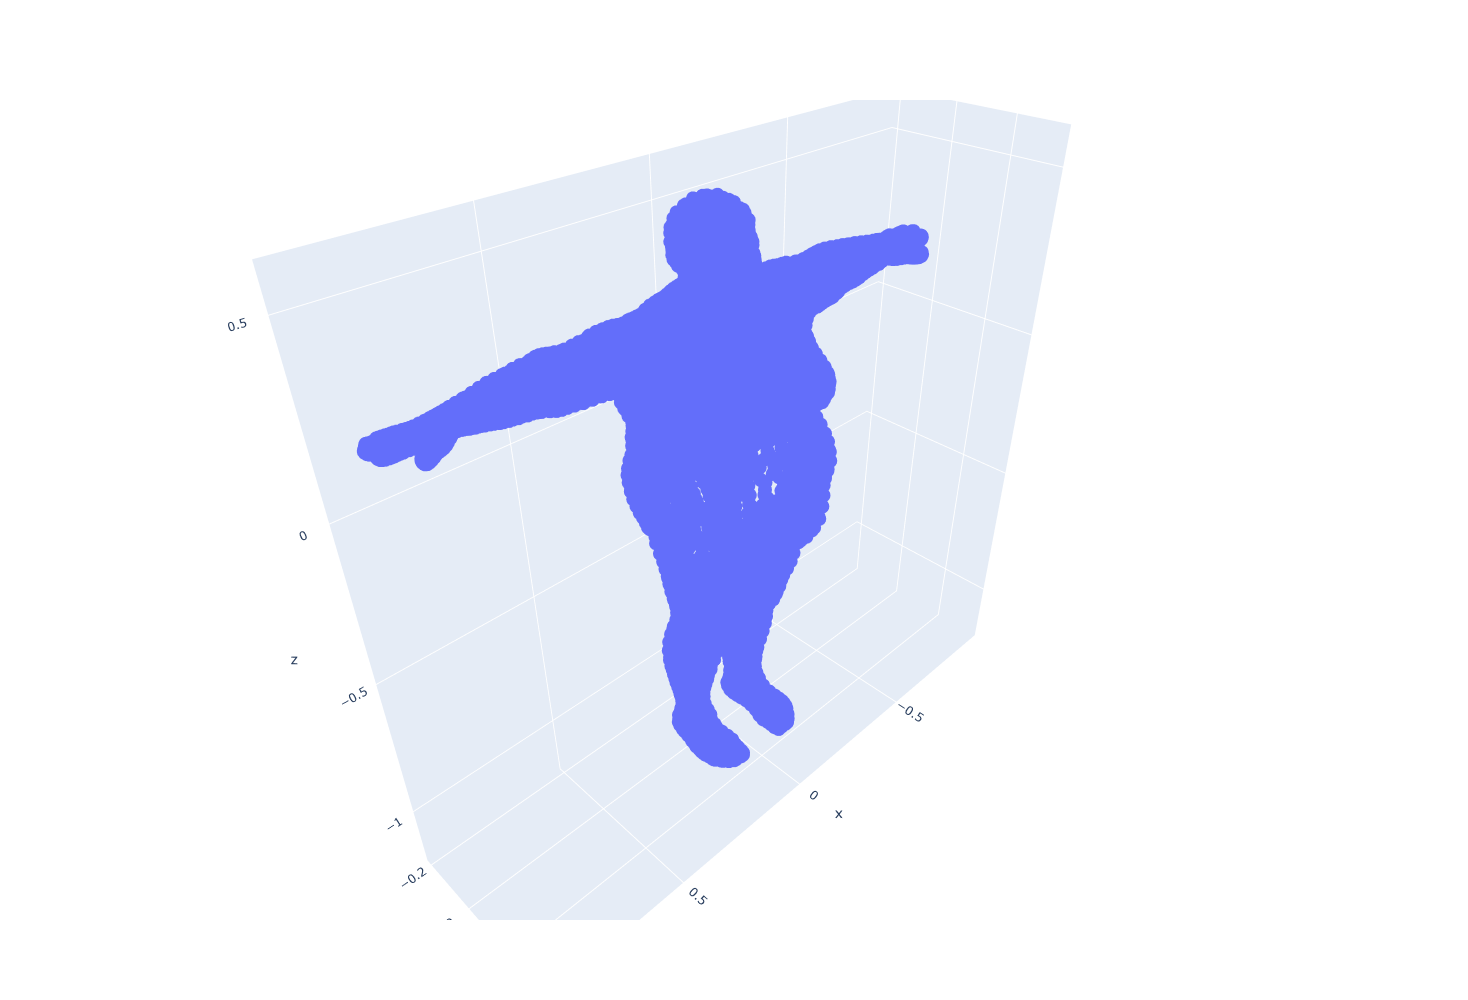

In [3]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(x=shaped[:,0], y=shaped[:,2], z=shaped[:,1],
                                   mode='markers')])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

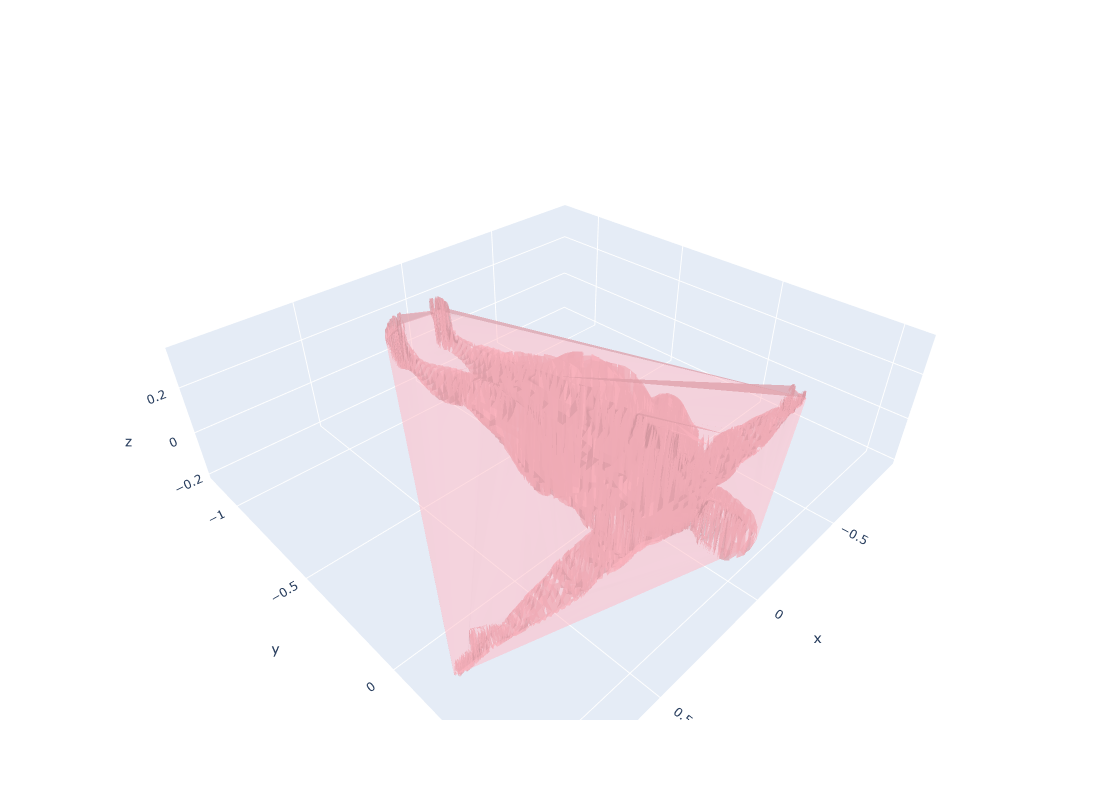

In [143]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Mesh3d(x=shaped[:,0], y=shaped[:,1], z=shaped[:,2], color='lightpink', opacity=0.50)])
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

In [109]:
from star.tf.star import STAR
import tensorflow as tf
import numpy as np
batch_size = 10
gender = 'male'
star = STAR()
trans = tf.constant(np.zeros((1,3)),dtype=tf.float32)
pose = tf.constant(np.zeros((1,72)),dtype=tf.float32)
betas = tf.constant(np.zeros((1,10)),dtype=tf.float32)
shaped=star(pose,betas,trans)
shaped=shaped._numpy()[0]
shaped

array([[ 4.6452515e-02,  4.7447899e-01,  8.4272072e-02],
       [ 4.0281929e-02,  4.6100092e-01,  9.3511984e-02],
       [ 5.1283851e-02,  4.5583543e-01,  8.5342325e-02],
       ...,
       [-7.4294090e-02,  4.0946224e-01, -1.4796059e-03],
       [-7.4568145e-02,  4.1136366e-01, -1.7024456e-04],
       [-7.7375717e-02,  4.0951803e-01,  2.8054148e-03]], dtype=float32)

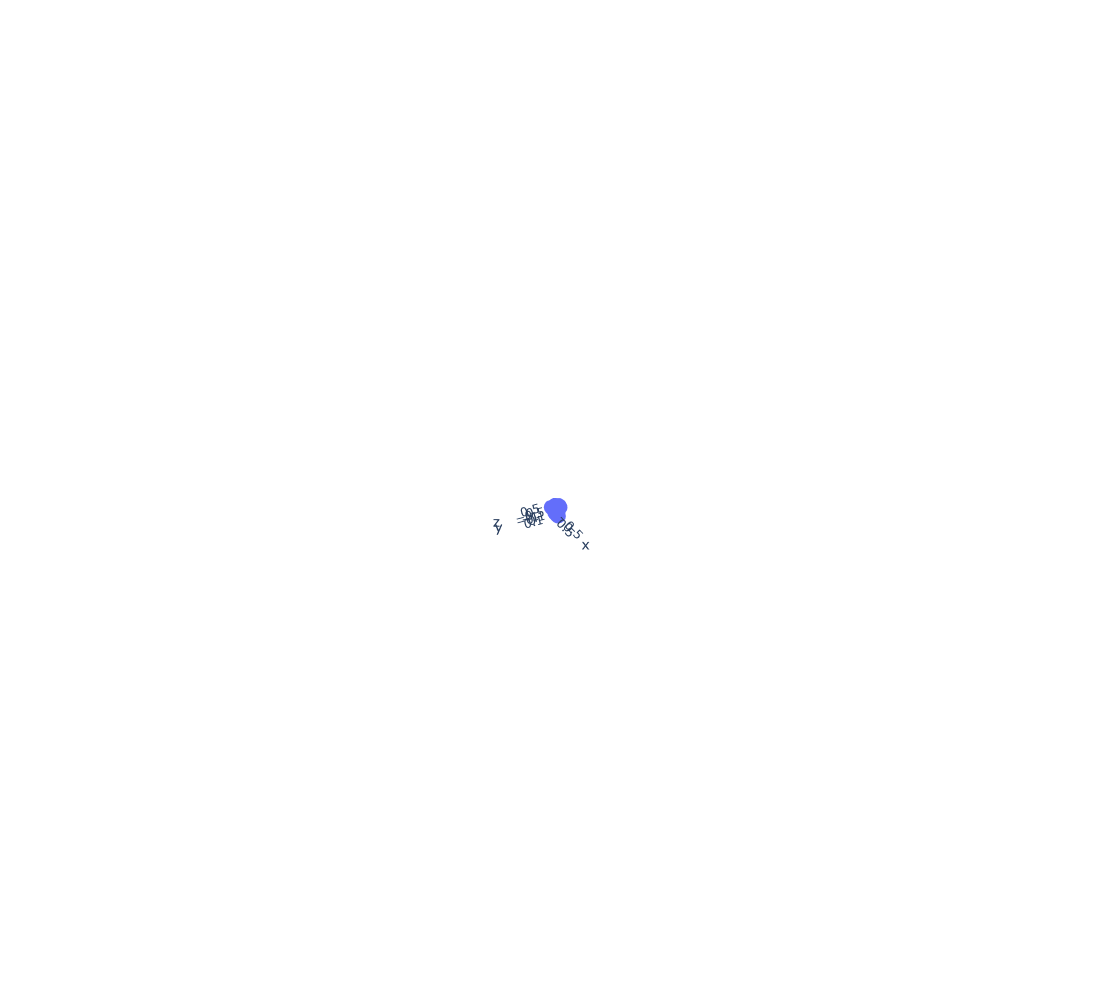

In [110]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(x=shaped[:,0], y=shaped[:,2], z=shaped[:,1],
                                   mode='markers')])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

In [155]:
#from pytorch.star import STAR
from star.pytorch.star import STAR
star = STAR(gender='female')
import torch
import numpy as np 
from torch.autograd import Variable
batch_size=1

# 姿态参数theta：24x3=72
poses = torch.cuda.FloatTensor(np.zeros((batch_size,72)))
poses = Variable(poses,requires_grad=True)
# 体型参数beta：10
betas = torch.cuda.FloatTensor(np.zeros((batch_size,10)))
betas = Variable(betas,requires_grad=True)
# 相机参数trans：3
trans = torch.cuda.FloatTensor(np.zeros((batch_size,3)))
trans = Variable(trans,requires_grad=True)
d = star(poses, betas,trans)

# 生成STAR的obj文件
d_np = d.cpu().detach().numpy()
print(d_np.shape)
outmesh_path = './hello_star.obj'
with open(outmesh_path, 'w') as fp:
    for i in d_np:
        for v in i:
            fp.write( 'v %f %f %f\n' % ( v[0], v[1], v[2]) )
    for f in star.f+1:
        fp.write( 'f %d %d %d\n' %  (f[0], f[1], f[2]) )
print("STAR模型已建立")

(1, 6890, 3)
STAR模型已建立
